In [1]:
import matplotlib
import DataGrabber
from DataGrabber import Feature
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error, mean_absolute_error

rms = "I://Models//AutoModels//1286432//rms128643207162020155124.32-0.08.h5"
chroma_stft = "I://Models//AutoModels//643216//chroma_stft64321607162020130440.33-0.08.h5"
env = "I://Models//AutoModels//1286432//env128643207162020155326.45-0.08.h5"
mfcc = "I://Models//AutoModels//643216//aNeu//mfcc64321607162020150740.127-0.08.h5"
zero_crossing = "I://Models//AutoModels//1286432//zero_crossing128643207162020155529.33-0.08.h5"
audio = "I://Models//AutoModels//RawAudio//RawAudio128643207172020112747.33-0.0860.h5"
stft = "I://AllDenseStft_stft128643207202020032723.23-0.0853.h5"
all_togheter = [rms, chroma_stft, env, mfcc, zero_crossing, stft]

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

All Data Appended
hallo


In [2]:
rmsLenet = "I://Models//AutoModels//1286432//rms128643207162020155124.32-0.08.h5"
chroma_stftLenet = "I://Models//AutoModels//643216//chroma_stft64321607162020130440.33-0.08.h5"
envLenet = "I://Models//AutoModels//1286432//env128643207162020155326.45-0.08.h5"
mfccLenet = "I://Models//AutoModels//643216//aNeu//mfcc64321607162020150740.127-0.08.h5"
zero_crossingLenet = "I://Models//AutoModels//1286432//zero_crossing128643207162020155529.33-0.08.h5"
audioLenet = "I://Models//AutoModels//RawAudio//RawAudio128643207172020112747.33-0.0860.h5"
stftLenet = "I://AllDenseStft_stft128643207202020032723.23-0.0853.h5"
all_togheter = [rms, chroma_stft, env, mfcc, zero_crossing, stft]

In [3]:
x_train, chroma_stft_x_test, y_train, chroma_stft_y_test = DataGrabber.getEvaluationData(DataGrabber.Feature.chroma_stft)
del x_train, y_train
chroma_stft_model = keras.models.load_model(chroma_stft, custom_objects={'leaky_relu': tf.nn.leaky_relu})
chroma_stft_predicted = chroma_stft_model.predict(chroma_stft_x_test)


All Data Appended


In [4]:
x_train, mfcc_x_test, y_train, mfcc_y_test = DataGrabber.getEvaluationData(DataGrabber.Feature.mfcc)
del x_train, y_train
mfcc_model = keras.models.load_model(mfcc, custom_objects={'leaky_relu': tf.nn.leaky_relu})
mfcc_predicted = mfcc_model.predict(mfcc_x_test)


All Data Appended


In [5]:
x_train, env_x_test, y_train, env_y_test = DataGrabber.getEvaluationData(DataGrabber.Feature.env)
del x_train, y_train
env_model = keras.models.load_model(env, custom_objects={'leaky_relu': tf.nn.leaky_relu})
env_predicted = env_model.predict(env_x_test)

All Data Appended


In [6]:

x_train, rms_x_test, y_train, rms_y_test = DataGrabber.getEvaluationData(DataGrabber.Feature.rms)
del x_train, y_train
rms_model = keras.models.load_model(rms, custom_objects={'leaky_relu': tf.nn.leaky_relu})
rms_predicted = rms_model.predict(rms_x_test)

All Data Appended


In [7]:
x_train, zero_crossing_x_test, y_train, zero_crossing_y_test = DataGrabber.getEvaluationData(DataGrabber.Feature.zero_crossing)
del x_train, y_train
zero_crossing_model = keras.models.load_model(zero_crossing, custom_objects={'leaky_relu': tf.nn.leaky_relu})
zero_crossing_predicted = zero_crossing_model.predict(zero_crossing_x_test)


#RMSModel = keras.models.load_model(rms, custom_objects={'leaky_relu': tf.nn.leaky_relu})

All Data Appended


In [8]:
x_train, audio_x_test, y_train, audio_y_test = DataGrabber.getEvaluationData(DataGrabber.Feature.audio)
del x_train, y_train
audio_model = keras.models.load_model(audio, custom_objects={'leaky_relu': tf.nn.leaky_relu})
audio_predicted = audio_model.predict(audio_x_test)



All Data Appended


In [9]:
x_train, stft_x_test, y_train, stft_y_test = DataGrabber.getEvaluationData(DataGrabber.Feature.stft)
del x_train, y_train
stft_model = keras.models.load_model(stft, custom_objects={'leaky_relu': tf.nn.leaky_relu})
stft_predicted = stft_model.predict(stft_x_test)

All Data Appended


In [10]:
import os
dir_files = os.listdir("I://Models//AutoModels//lenet//all//")
models = []

for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//lenet//all//" +file)
    models.append(m)

In [11]:
audioAllLeNet_predict= models[0].predict(audio_x_test)

chromaAllLeNet_predict= models[1].predict(chroma_stft_x_test)
env10AllLeNet_predict = models[2].predict(env_x_test)
msccAllLeNet_predict = models[3].predict(mfcc_x_test)
rmsAllLeNet_predict = models[4].predict(rms_x_test)
stftAllLeNet_predict = models[5].predict(stft_x_test)
zeroAllLeNet_predict = models[6].predict(zero_crossing_x_test)


In [12]:
chroma_stft_mse = mean_squared_error(chroma_stft_y_test, chroma_stft_predicted, multioutput='raw_values')
mfcc_mse = mean_squared_error(mfcc_y_test, mfcc_predicted, multioutput='raw_values')
env_mse = mean_squared_error(env_y_test, env_predicted, multioutput='raw_values')
rms_mse = mean_squared_error(rms_y_test, rms_predicted, multioutput='raw_values')
zero_crossing_mse = mean_squared_error(zero_crossing_y_test, zero_crossing_predicted, multioutput='raw_values')
stft_mse = mean_squared_error(stft_y_test, stft_predicted, multioutput='raw_values')
audio_mse = mean_squared_error(audio_y_test, audio_predicted, multioutput='raw_values')


chroma_stft_mae = mean_absolute_error(chroma_stft_y_test, chroma_stft_predicted, multioutput='raw_values')
mfcc_mae = mean_absolute_error(mfcc_y_test, mfcc_predicted, multioutput='raw_values')
env_mae = mean_absolute_error(env_y_test, env_predicted, multioutput='raw_values')
rms_mae = mean_absolute_error(rms_y_test, rms_predicted, multioutput='raw_values')
zero_crossing_mae = mean_absolute_error(zero_crossing_y_test, zero_crossing_predicted, multioutput='raw_values')
stft_mae = mean_absolute_error(stft_y_test, stft_predicted, multioutput='raw_values')
audio_mae = mean_absolute_error(audio_y_test, audio_predicted, multioutput='raw_values')

chroma_stft_mae_LeNet = mean_absolute_error(chroma_stft_y_test, chromaAllLeNet_predict, multioutput='raw_values')
mfcc_mae_LeNet = mean_absolute_error(mfcc_y_test, msccAllLeNet_predict, multioutput='raw_values')
env_mae_LeNet = mean_absolute_error(env_y_test, env10AllLeNet_predict, multioutput='raw_values')
rms_mae_LeNet = mean_absolute_error(rms_y_test, rmsAllLeNet_predict, multioutput='raw_values')
zero_crossing_mae_LeNet = mean_absolute_error(zero_crossing_y_test, zeroAllLeNet_predict, multioutput='raw_values')
stft_mae_LeNet = mean_absolute_error(stft_y_test, stftAllLeNet_predict, multioutput='raw_values')
audio_mae_LeNet = mean_absolute_error(audio_y_test, audioAllLeNet_predict, multioutput='raw_values')




In [14]:
import matplotlib.pyplot as plt
import numpy as np
# plt.plot(result, "o", ms=2)
# plt.plot(result1, "ro", ms=2)
#
# plt.ylabel("error rate")
# plt.xlabel("parameter number")
# plt.savefig("miiis.png", dpi=300)
# plt.show()

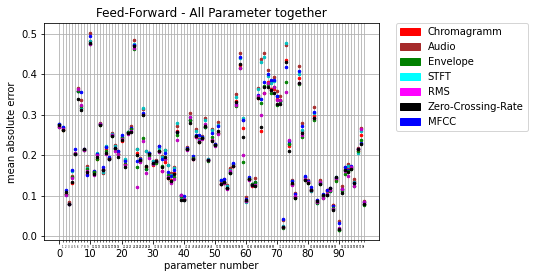

In [30]:
import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 99, 10)
minor_ticks = np.arange(0, 99, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis="x", which="major", labelsize=10, pad=5)
ax.tick_params(axis="x", which="minor", labelsize=2.5, pad=2)
formatter = matplotlib.ticker.FormatStrFormatter('%1d')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.labelpad = 100

# And a corresponding grid
ax.grid(which='both')

red_patch = mpatches.Patch(color='red', label='Chromagramm')
blue_patch = mpatches.Patch(color='blue', label='MFCC')
green_patch = mpatches.Patch(color='green', label='Amplitude')
magenta_patch = mpatches.Patch(color='magenta', label='RMS')
black_patch = mpatches.Patch(color='black', label='Zero-Crossing-Rate')
cyan_patch = mpatches.Patch(color="cyan", label="STFT")
yellow_patch = mpatches.Patch(color="brown", label="Audio")


lgd = plt.legend(handles=[red_patch, yellow_patch, green_patch, cyan_patch, magenta_patch, black_patch, blue_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.plot(chroma_stft_mae, "o", color="red", ms=2.5)
plt.plot(audio_mae, "o", color="brown", ms=2.5)
plt.plot(stft_mae, "co", ms=2.5)
plt.plot(mfcc_mae, "bo", ms=2.5)
plt.plot(env_mae, "go", ms=2.5)
plt.plot(rms_mae, "mo", ms=2.5)
plt.plot(zero_crossing_mae, "ko", ms=2.5)
plt.ylabel("mean absolute error")
plt.xlabel("parameter number", labelpad=2)
plt.title("Feed-Forward - All Parameter together")
plt.savefig("mae_per_parameter.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()



In [ ]:
import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 99, 10)
minor_ticks = np.arange(0, 99, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis="x", which="major", labelsize=10, pad=5)
ax.tick_params(axis="x", which="minor", labelsize=2.5, pad=2)
formatter = matplotlib.ticker.FormatStrFormatter('%1d')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.labelpad = 100

# And a corresponding grid
ax.grid(which='both')

red_patch = mpatches.Patch(color='red', label='Chromagramm')
blue_patch = mpatches.Patch(color='blue', label='MFCC')
green_patch = mpatches.Patch(color='green', label='Amplitude')
magenta_patch = mpatches.Patch(color='magenta', label='RMS')
black_patch = mpatches.Patch(color='black', label='Zero-Crossing-Rate')
cyan_patch = mpatches.Patch(color="cyan", label="STFT")
yellow_patch = mpatches.Patch(color="brown", label="Audio")


lgd = plt.legend(handles=[red_patch, yellow_patch, green_patch, cyan_patch, magenta_patch, black_patch, blue_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.plot(chroma_stft_mse, "o", color="red", ms=3)
plt.plot(audio_mse, "o", color="brown", ms=3)
plt.plot(stft_mse, "co", ms=3)
plt.plot(mfcc_mse, "bo", ms=3)
plt.plot(env_mse, "go", ms=3)
plt.plot(rms_mse, "mo", ms=3)
plt.plot(zero_crossing_mse, "ko", ms=3)
plt.ylabel("mean square error")
plt.xlabel("parameter number", labelpad=2)
plt.savefig("mse_per_parameter.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


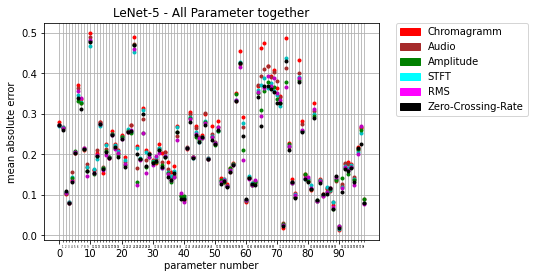

In [44]:
# LeNet All mfcc so schlecht darum ussa
import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 99, 10)
minor_ticks = np.arange(0, 99, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis="x", which="major", labelsize=10, pad=5)
ax.tick_params(axis="x", which="minor", labelsize=2.5, pad=2)
formatter = matplotlib.ticker.FormatStrFormatter('%1d')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.labelpad = 100

# And a corresponding grid
ax.grid(which='both')

red_patch = mpatches.Patch(color='red', label='Chromagramm')
#blue_patch = mpatches.Patch(color='blue', label='MFCC')
green_patch = mpatches.Patch(color='green', label='Amplitude')
magenta_patch = mpatches.Patch(color='magenta', label='RMS')
black_patch = mpatches.Patch(color='black', label='Zero-Crossing-Rate')
cyan_patch = mpatches.Patch(color="cyan", label="STFT")
yellow_patch = mpatches.Patch(color="brown", label="Audio")


lgd = plt.legend(handles=[red_patch, yellow_patch, green_patch, cyan_patch, magenta_patch, black_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.plot(chroma_stft_mae_LeNet, "o", color="red", ms=3)
plt.plot(audio_mae_LeNet, "o", color="brown", ms=3)
plt.plot(stft_mae_LeNet, "co", ms=3)
#plt.plot(mfcc_mae_LeNet, "bo", ms=3)
plt.plot(env_mae_LeNet, "go", ms=3)
plt.plot(rms_mae_LeNet, "mo", ms=3)
plt.plot(zero_crossing_mae, "ko", ms=3)
plt.ylabel("mean absolute error")
plt.xlabel("parameter number", labelpad=2)
plt.title("LeNet-5 - All Parameter together")
plt.savefig("mae_per_parameter_Lenet.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


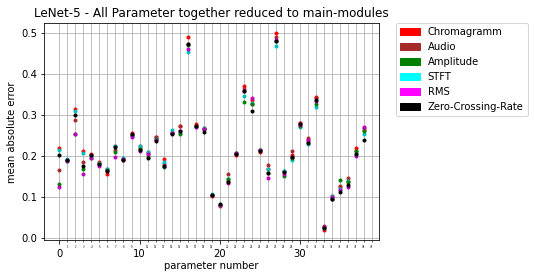

In [35]:
# miniize all paras to all modules from LeNet
allModuleIndexes = [25, 26, 27, 28, 29, 30, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 45, 71, 72, 76, 91, 95, 96, 97]

chromaModulesOfParasPredicts = [chroma_stft_mae_LeNet[i] for i in allModuleIndexes]
audioModulesOfParasPredicts = [audio_mae_LeNet[i] for i in allModuleIndexes]
stftModulesOfParasPredicts = [stft_mae_LeNet[i] for i in allModuleIndexes]
envModulesOfParasPredicts = [env_mae_LeNet[i] for i in allModuleIndexes]
rmsModulesOfParasPredicts = [rms_mae_LeNet[i] for i in allModuleIndexes]
zeroModulesOfParasPredicts = [zero_crossing_mae_LeNet[i] for i in allModuleIndexes]
mfccModulesOfParasPredicts = [mfcc_mae_LeNet[i] for i in allModuleIndexes]


# LeNet All mfcc so schlecht darum ussa
import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 99, 10)
minor_ticks = np.arange(0, 99, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis="x", which="major", labelsize=10, pad=5)
ax.tick_params(axis="x", which="minor", labelsize=2.5, pad=2)
formatter = matplotlib.ticker.FormatStrFormatter('%1d')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.labelpad = 100

# And a corresponding grid
ax.grid(which='both')

red_patch = mpatches.Patch(color='red', label='Chromagramm')
#blue_patch = mpatches.Patch(color='blue', label='MFCC')
green_patch = mpatches.Patch(color='green', label='Amplitude')
magenta_patch = mpatches.Patch(color='magenta', label='RMS')
black_patch = mpatches.Patch(color='black', label='Zero-Crossing-Rate')
cyan_patch = mpatches.Patch(color="cyan", label="STFT")
yellow_patch = mpatches.Patch(color="brown", label="Audio")


lgd = plt.legend(handles=[red_patch, yellow_patch, green_patch, cyan_patch, magenta_patch, black_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.plot(chromaModulesOfParasPredicts, "o", color="red", ms=3)
plt.plot(audioModulesOfParasPredicts, "o", color="brown", ms=3)
plt.plot(stftModulesOfParasPredicts, "co", ms=3)
#plt.plot(mfccModulesOfParasPredicts, "bo", ms=3)
plt.plot(envModulesOfParasPredicts, "go", ms=3)
plt.plot(rmsModulesOfParasPredicts, "mo", ms=3)
plt.plot(zeroModulesOfParasPredicts, "ko", ms=3)
plt.ylabel("mean absolute error")
plt.xlabel("parameter number", labelpad=2)
plt.title("LeNet-5 - All Parameter together reduced to main-modules")
plt.savefig("mae_per_parameter_LeNet_reduced.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


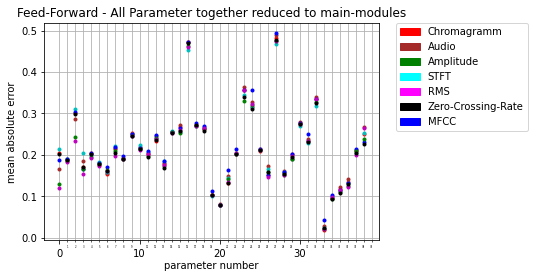

In [37]:

# miniize all paras to all modules from Dense
allModuleIndexes = [25, 26, 27, 28, 29, 30, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 45, 71, 72, 76, 91, 95, 96, 97]

chromaModulesOfParasPredicts2 = [chroma_stft_mae[i] for i in allModuleIndexes]
audioModulesOfParasPredicts2 = [audio_mae[i] for i in allModuleIndexes]
stftModulesOfParasPredicts2 = [stft_mae[i] for i in allModuleIndexes]
envModulesOfParasPredicts2 = [env_mae[i] for i in allModuleIndexes]
rmsModulesOfParasPredicts2 = [rms_mae[i] for i in allModuleIndexes]
zeroModulesOfParasPredicts2 = [zero_crossing_mae[i] for i in allModuleIndexes]
mfccModulesOfParasPredicts2 = [mfcc_mae[i] for i in allModuleIndexes]


# LeNet All mfcc so schlecht darum ussa
import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 99, 10)
minor_ticks = np.arange(0, 99, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis="x", which="major", labelsize=10, pad=5)
ax.tick_params(axis="x", which="minor", labelsize=2.5, pad=2)
formatter = matplotlib.ticker.FormatStrFormatter('%1d')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.labelpad = 100

# And a corresponding grid
ax.grid(which='both')

red_patch = mpatches.Patch(color='red', label='Chromagramm')
blue_patch = mpatches.Patch(color='blue', label='MFCC')
green_patch = mpatches.Patch(color='green', label='Amplitude')
magenta_patch = mpatches.Patch(color='magenta', label='RMS')
black_patch = mpatches.Patch(color='black', label='Zero-Crossing-Rate')
cyan_patch = mpatches.Patch(color="cyan", label="STFT")
yellow_patch = mpatches.Patch(color="brown", label="Audio")


lgd = plt.legend(handles=[red_patch, yellow_patch, green_patch, cyan_patch, magenta_patch, black_patch, blue_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
chrom = [chromaModulesOfParasPredicts, chromaModulesOfParasPredicts2]
audio = [audioModulesOfParasPredicts, audioModulesOfParasPredicts2]
stft = [stftModulesOfParasPredicts, stftModulesOfParasPredicts2]
mfcc = [mfccModulesOfParasPredicts, mfccModulesOfParasPredicts2]
env = [envModulesOfParasPredicts, envModulesOfParasPredicts2]
rms = [rmsModulesOfParasPredicts, rmsModulesOfParasPredicts2]
zero = [zeroModulesOfParasPredicts, zeroModulesOfParasPredicts2]
plt.plot(np.amin(chrom, axis=0), "o", color="red", ms=3)
plt.plot(np.amin(audio, axis=0), "o", color="brown", ms=3)
plt.plot(np.amin(stft, axis=0), "co", ms=3)
plt.plot(np.amin(mfcc, axis=0), "bo", ms=3)
plt.plot(np.amin(env, axis=0), "go", ms=3)
plt.plot(np.amin(rms, axis=0), "mo", ms=3)
plt.plot(np.amin(zero, axis=0), "ko", ms=3)
plt.ylabel("mean absolute error")
plt.xlabel("parameter number", labelpad=2)
plt.title("Feed-Forward - All Parameter together reduced to main-modules")
plt.savefig("mae_per_parameter_DenseandLeNet_reduced.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

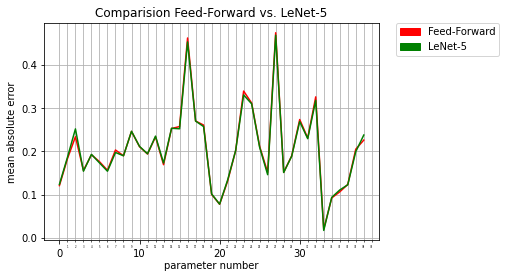

In [34]:


# get best values from moules Dense und Modules Lenet
allModuleIndexes = [25, 26, 27, 28, 29, 30, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 45, 71, 72, 76, 91, 95, 96, 97]

chromaModulesOfParasPredicts = [chroma_stft_mae[i] for i in allModuleIndexes]
audioModulesOfParasPredicts = [audio_mae[i] for i in allModuleIndexes]
stftModulesOfParasPredicts = [stft_mae[i] for i in allModuleIndexes]
envModulesOfParasPredicts = [env_mae[i] for i in allModuleIndexes]
rmsModulesOfParasPredicts = [rms_mae[i] for i in allModuleIndexes]
zeroModulesOfParasPredicts = [zero_crossing_mae[i] for i in allModuleIndexes]
mfccModulesOfParasPredicts = [mfcc_mae[i] for i in allModuleIndexes]

best = np.array([chromaModulesOfParasPredicts, audioModulesOfParasPredicts, stftModulesOfParasPredicts, envModulesOfParasPredicts, rmsModulesOfParasPredicts, zeroModulesOfParasPredicts, mfccModulesOfParasPredicts])
bestDense = np.amin(best, axis=0)

chromaModulesOfParasPredicts = [chroma_stft_mae_LeNet[i] for i in allModuleIndexes]
audioModulesOfParasPredicts = [audio_mae_LeNet[i] for i in allModuleIndexes]
stftModulesOfParasPredicts = [stft_mae_LeNet[i] for i in allModuleIndexes]
envModulesOfParasPredicts = [env_mae_LeNet[i] for i in allModuleIndexes]
rmsModulesOfParasPredicts = [rms_mae_LeNet[i] for i in allModuleIndexes]
zeroModulesOfParasPredicts = [zero_crossing_mae_LeNet[i] for i in allModuleIndexes]
mfccModulesOfParasPredicts = [mfcc_mae_LeNet[i] for i in allModuleIndexes]

best = np.array([chromaModulesOfParasPredicts, audioModulesOfParasPredicts, stftModulesOfParasPredicts, envModulesOfParasPredicts, rmsModulesOfParasPredicts, zeroModulesOfParasPredicts, mfccModulesOfParasPredicts])
bestLeNet = np.amin(best, axis=0)



# LeNet All mfcc so schlecht darum ussa
import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 99, 10)
minor_ticks = np.arange(0, 99, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis="x", which="major", labelsize=10, pad=5)
ax.tick_params(axis="x", which="minor", labelsize=2.5, pad=2)
formatter = matplotlib.ticker.FormatStrFormatter('%1d')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.labelpad = 100

# And a corresponding grid
ax.grid(which='both')

red_patch = mpatches.Patch(color='red', label='Feed-Forward')
green_patch = mpatches.Patch(color='green', label='LeNet-5')



lgd = plt.legend(handles=[red_patch, green_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.plot(bestDense, color="red", ms=3)
plt.plot(bestLeNet, color="green", ms=3)
plt.ylabel("mean absolute error")
plt.xlabel("parameter number", labelpad=2)
plt.title("Comparision Feed-Forward vs. LeNet-5")
plt.savefig("mae_reduced_Comparison_Layer.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [14]:
import os
import numpy as np
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

ampI = [25, 26, 27, 28, 29, 30]
filterI = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
oscI = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 45, 71, 72, 76, 91, 95, 96, 97]
dir_files = os.listdir("I://Models//AutoModels//LeNetModules//Chroma")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//LeNetModules//Chroma//" +file)
    models2.append(m)
predictList = []
for mod in models2:
    predictList.append(mod.predict(chroma_stft_x_test))

dir_files = os.listdir("I://Models//AutoModels//LeNetModules//Env")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//LeNetModules//Env//" +file)
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(env_x_test))

dir_files = os.listdir("I://Models//AutoModels//LeNetModules//mfcc")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//LeNetModules//mfcc//" +file)
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(mfcc_x_test))

dir_files = os.listdir("I://Models//AutoModels//LeNetModules//Rms")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//LeNetModules//Rms//" +file)
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(rms_x_test))

dir_files = os.listdir("I://Models//AutoModels//LeNetModules//stft")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//LeNetModules//stft//" +file)
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(stft_x_test))

dir_files = os.listdir("I://Models//AutoModels//LeNetModules//zero")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//LeNetModules//zero//" +file)
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(zero_crossing_x_test))

envs = predictList[0::3]
yTest = []
for i, test in enumerate(env_y_test):
    yTest.append([ test[i] for i in ampI])
for i, e in enumerate(envs):
    envs[i] = mean_absolute_error( yTest, e, multioutput='raw_values')
envs = np.amin(envs, axis=0)

filters = predictList[1::3]
yTest = []
for i, test in enumerate(env_y_test):
    yTest.append([ test[i] for i in filterI])
for i, e in enumerate(filters):
    filters[i] = mean_absolute_error( yTest, e, multioutput='raw_values')
filters = np.amin(filters, axis=0)

oscs = predictList[2::3]
yTest = []
for i, test in enumerate(env_y_test):
    yTest.append([ test[i] for i in oscI])
for i, e in enumerate(oscs):
    oscs[i] = mean_absolute_error( yTest, e, multioutput='raw_values')
oscs = np.amin(oscs, axis=0)



In [15]:
ampI = [25, 26, 27, 28, 29, 30]
filterI = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
oscI = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 45, 71, 76, 95, 96, 97]
dir_files = os.listdir("I://Models//AutoModels//Feed//Chroma")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//Feed//Chroma//" +file, custom_objects={'leaky_relu': tf.nn.leaky_relu})
    models2.append(m)
predictList = []
for mod in models2:
    predictList.append(mod.predict(chroma_stft_x_test))

dir_files = os.listdir("I://Models//AutoModels//Feed//Env")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//Feed//Env//" +file, custom_objects={'leaky_relu': tf.nn.leaky_relu})
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(env_x_test))

dir_files = os.listdir("I://Models//AutoModels//Feed//mfcc")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//Feed//mfcc//" +file, custom_objects={'leaky_relu': tf.nn.leaky_relu})
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(mfcc_x_test))

dir_files = os.listdir("I://Models//AutoModels//Feed//Rms")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//Feed//Rms//" +file, custom_objects={'leaky_relu': tf.nn.leaky_relu})
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(rms_x_test))

dir_files = os.listdir("I://Models//AutoModels//Feed//stft")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//Feed//stft//" +file, custom_objects={'leaky_relu': tf.nn.leaky_relu})
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(stft_x_test))

dir_files = os.listdir("I://Models//AutoModels//Feed//zero")
models2 = []
for file in dir_files:
    m = keras.models.load_model("I://Models//AutoModels//Feed//zero//" +file, custom_objects={'leaky_relu': tf.nn.leaky_relu})
    models2.append(m)
for mod in models2:
    predictList.append(mod.predict(zero_crossing_x_test))

envs_feed = predictList[0::3]
yTest = []
for i, test in enumerate(env_y_test):
    yTest.append([ test[i] for i in ampI])
for i, e in enumerate(envs_feed):
    envs_feed[i] = mean_absolute_error( yTest, e, multioutput='raw_values')
envs_feed = np.amin(envs_feed, axis=0)

filters_feed = predictList[2::3]
yTest = []

for i, test in enumerate(env_y_test):
    yTest.append([ test[i] for i in filterI])
for i, e in enumerate(filters_feed):
    filters_feed[i] = mean_absolute_error( yTest, e, multioutput='raw_values')
filters_feed = np.amin(filters_feed, axis=0)

In [16]:
oscs_feed = predictList[1::3]
del oscs_feed[4]

In [17]:
yTest = []
for i, test in enumerate(env_y_test):
    yTest.append([ test[i] for i in oscI])
for i, e in enumerate(oscs_feed):
    oscs_feed[i] = mean_absolute_error( yTest, e, multioutput='raw_values')
oscs_feed = np.amin(oscs_feed, axis=0)

In [21]:
FeddResults = []
for i in envs_feed:
    FeddResults.append(i)
for i in filters_feed:
    FeddResults.append(i)
for index, i in enumerate(oscs_feed):

        FeddResults.append(i)

In [19]:
LeNetResults = []
for i in envs:
    LeNetResults.append(i)
for i in filters:
    LeNetResults.append(i)
for index, i in enumerate(oscs):
    LeNetResults.append(i)
#np.concatenate(envs_feed, filters_feed, oscs_feed)
bestAllNet = np.amin(bestDense)

In [26]:
temp = np.array([bestDense, bestLeNet])
bestAllNet = np.amin(temp, axis=0)

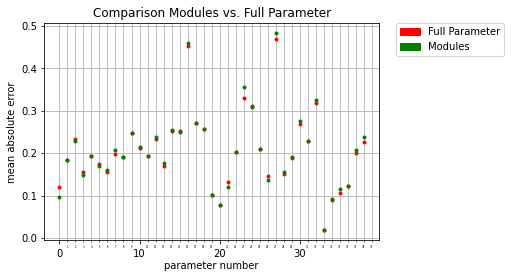

In [33]:
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 99, 10)
minor_ticks = np.arange(0, 99, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis="x", which="major", labelsize=10, pad=5)
ax.tick_params(axis="x", which="minor", labelsize=2.5, pad=2)
formatter = matplotlib.ticker.FormatStrFormatter('%1d')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.labelpad = 100

# And a corresponding grid
ax.grid(which='both')

red_patch = mpatches.Patch(color='red', label='Full Parameter')
green_patch = mpatches.Patch(color='green', label='Modules')



lgd = plt.legend(handles=[red_patch, green_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.plot(bestAllNet, "o", color="red", ms=3)
plt.plot(LeNetResults, "o", color="green", ms=3)
plt.ylabel("mean absolute error")
plt.xlabel("parameter number", labelpad=2)
plt.title("Comparison Modules vs. Full Parameter")
plt.savefig("Modelldifferenz.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()